<a href="https://colab.research.google.com/github/shubhamnawani99/stocks-analysis/blob/master/Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
#3.1
gold_path = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/GOLD.csv"
gold = pd.read_csv(gold_path)
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [24]:
gold.set_index('Date',inplace = True)
gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [25]:
gold_noNaN = gold.dropna()
gold_noNaN

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


In [0]:
def Linear_Regression(x, y):
  x = x.reshape(-1,1)
  y = y.reshape(-1,1)

  model = LinearRegression()
  model.fit(x,y)
  predicted = model.predict(x)

  rmse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)

  print('Slope:' ,model.coef_)
  print('Intercept:', model.intercept_)
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  plt.scatter(x, y, s=10)
  plt.xlabel('x')
  plt.ylabel('y')

  plt.plot(x, predicted, color='r')
  plt.show()

Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


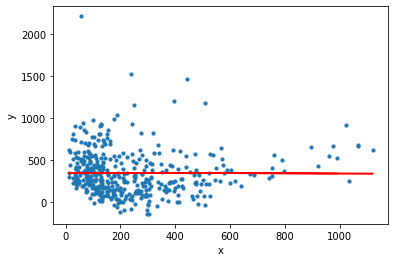

In [31]:
x = np.array(gold_noNaN["new"])
y = np.array(gold_noNaN["Pred"])
Linear_Regression(x,y)

In [27]:
pre_data = gold
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (model.predict(pre_data_new))
gold['Pred'] = na_data
gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  2.0681422785657492e-23
R2 score:  1.0


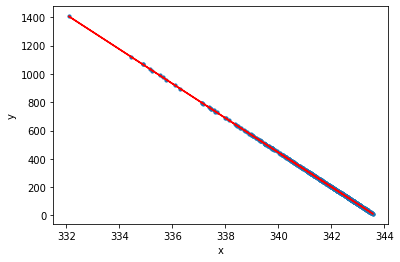

In [32]:
y = np.array(gold["new"])
x = np.array(gold["Pred"])
Linear_Regression(x,y)

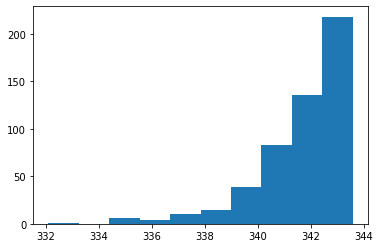

In [33]:
plt.hist(gold['Pred'])
plt.show()

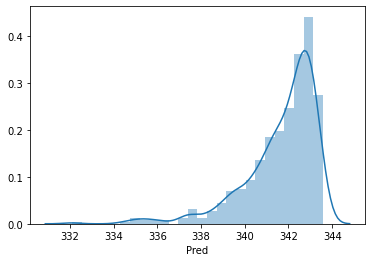

In [35]:
import seaborn as sns
sns.distplot(gold['Pred'])
plt.show()

In [41]:
#3.2
tcs_path = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/TCS.csv"
tcs = pd.read_csv(tcs_path)
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs.set_index('Date', inplace=True)
tcs = tcs[tcs['Series'] == 'EQ']
tcs

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27


In [43]:
nifty = pd.read_csv('https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Nifty50/Nifty50.csv')
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty = nifty.sort_values('Date')
nifty.set_index('Date', inplace=True)
nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [0]:
tcs_90 = tcs[403:]
nifty_90 = nifty[403:]

In [0]:
tcs_return = tcs_90['Close Price'].pct_change()
nifty_return = nifty_90['Close'].pct_change()

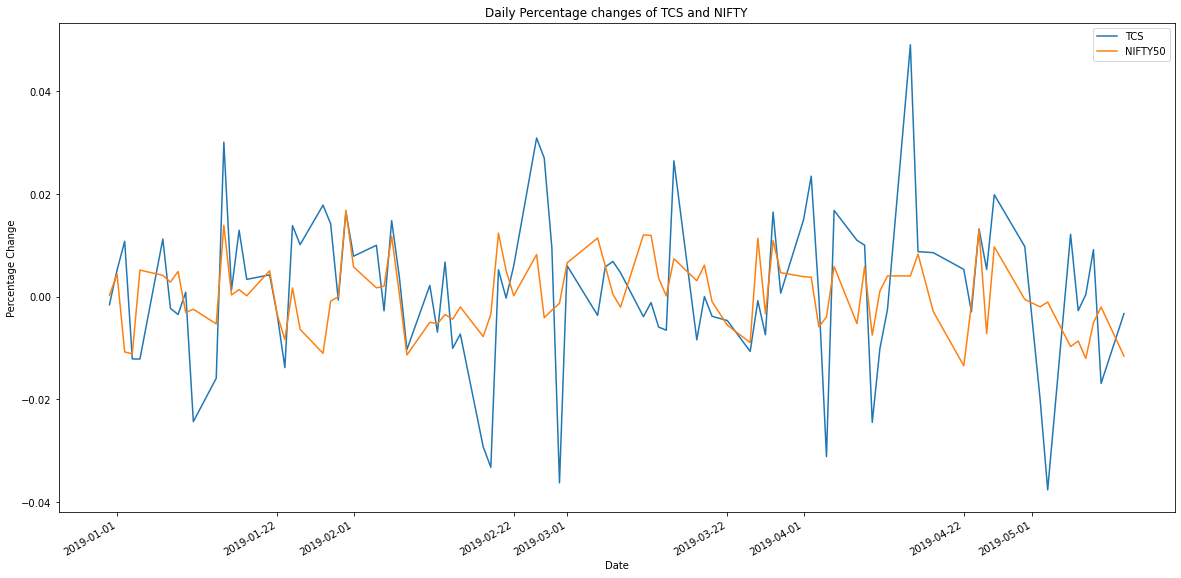

In [84]:
plt.figure(figsize=(20,10))
tcs_return.plot()
nifty_return.plot()
plt.ylabel("Percentage Change")
plt.title("Daily Percentage changes of TCS and NIFTY")
plt.legend(["TCS","NIFTY50"])
plt.show()

In [87]:
tcs_90['pct_change'] = tcs_90['Close Price'].pct_change()
nifty_90['pct_change'] = nifty_90['Close'].pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
x = tcs_90['pct_change'].dropna()
y = nifty_90['pct_change'].dropna()
y = y.add(x)
myModel = sm.OLS(y,x,missing='drop').fit()
print(myModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             pct_change   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              645.9
Date:                Sat, 23 May 2020   Prob (F-statistic):                    1.43e-42
Time:                        14:42:53   Log-Likelihood:                          326.97
No. Observations:                  90   AIC:                                     -651.9
Df Residuals:                      89   BIC:                                     -649.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
monthly_prices = pd.concat([tcs['Close Price'], nifty['Close']], axis=1)
monthly_prices.columns = ['TCS', 'NIFTY50']

print(monthly_prices)

monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  

print(clean_monthly_returns)

                TCS   NIFTY50
Date                         
2017-05-15  2365.10   9445.40
2017-05-16  2429.15   9512.25
2017-05-17  2455.35   9525.75
2017-05-18  2536.20   9429.45
2017-05-19  2507.15   9427.90
...             ...       ...
2019-05-07  2151.95  11497.90
2019-05-08  2152.85  11359.45
2019-05-09  2172.55  11301.80
2019-05-10  2135.80  11278.90
2019-05-13  2128.75  11148.20

[494 rows x 2 columns]
                 TCS   NIFTY50
Date                          
2017-05-16  0.027081  0.007078
2017-05-17  0.010786  0.001419
2017-05-18  0.032928 -0.010109
2017-05-19 -0.011454 -0.000164
2017-05-22  0.009652  0.001098
...              ...       ...
2019-05-07 -0.002734 -0.008652
2019-05-08  0.000418 -0.012041
2019-05-09  0.009151 -0.005075
2019-05-10 -0.016916 -0.002026
2019-05-13 -0.003301 -0.011588

[493 rows x 2 columns]


In [90]:
X = clean_monthly_returns['TCS']
y = clean_monthly_returns['NIFTY50']

X1 = sm.add_constant(X)
model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.951
Date:                Sat, 23 May 2020   Prob (F-statistic):              0.163
Time:                        14:43:56   Log-Likelihood:                 1733.8
No. Observations:                 493   AIC:                            -3464.
Df Residuals:                     491   BIC:                            -3455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.102      0.2

In [0]:
# for the past 3 months (~90 days) daily beta value of TCS stock is 1.1623 which is greater than 1

In [0]:
#monthly beta value is 0.0167 which is also less than 1